## Introduction

In this Kaggle notebook, we tackle the practical challenge of predicting customer churn within the banking sector. With a dataset of 10,000 records at hand, our focus is on uncovering insights and patterns that indicate a customer's likelihood of leaving the bank. By utilizing deep learning techniques, we aim to provide a data-driven approach to identifying potential churn and contributing to effective retention strategies.

For that our job consist of some steps :
1. Getting The Data
2. Cleaning Our Data
3. Data Preproccessing And Feature Engineering
4. Building Our Neural Network Model 
5. Making Predictions 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

## Getting The Data

Since Our data is a csv format it would be a great choise to transforme it into a DataFrame using **read_csv** 

In [2]:
data = pd.read_csv("/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Statistics

Now that we got our data , our job is to have a look at it and understand its structure

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


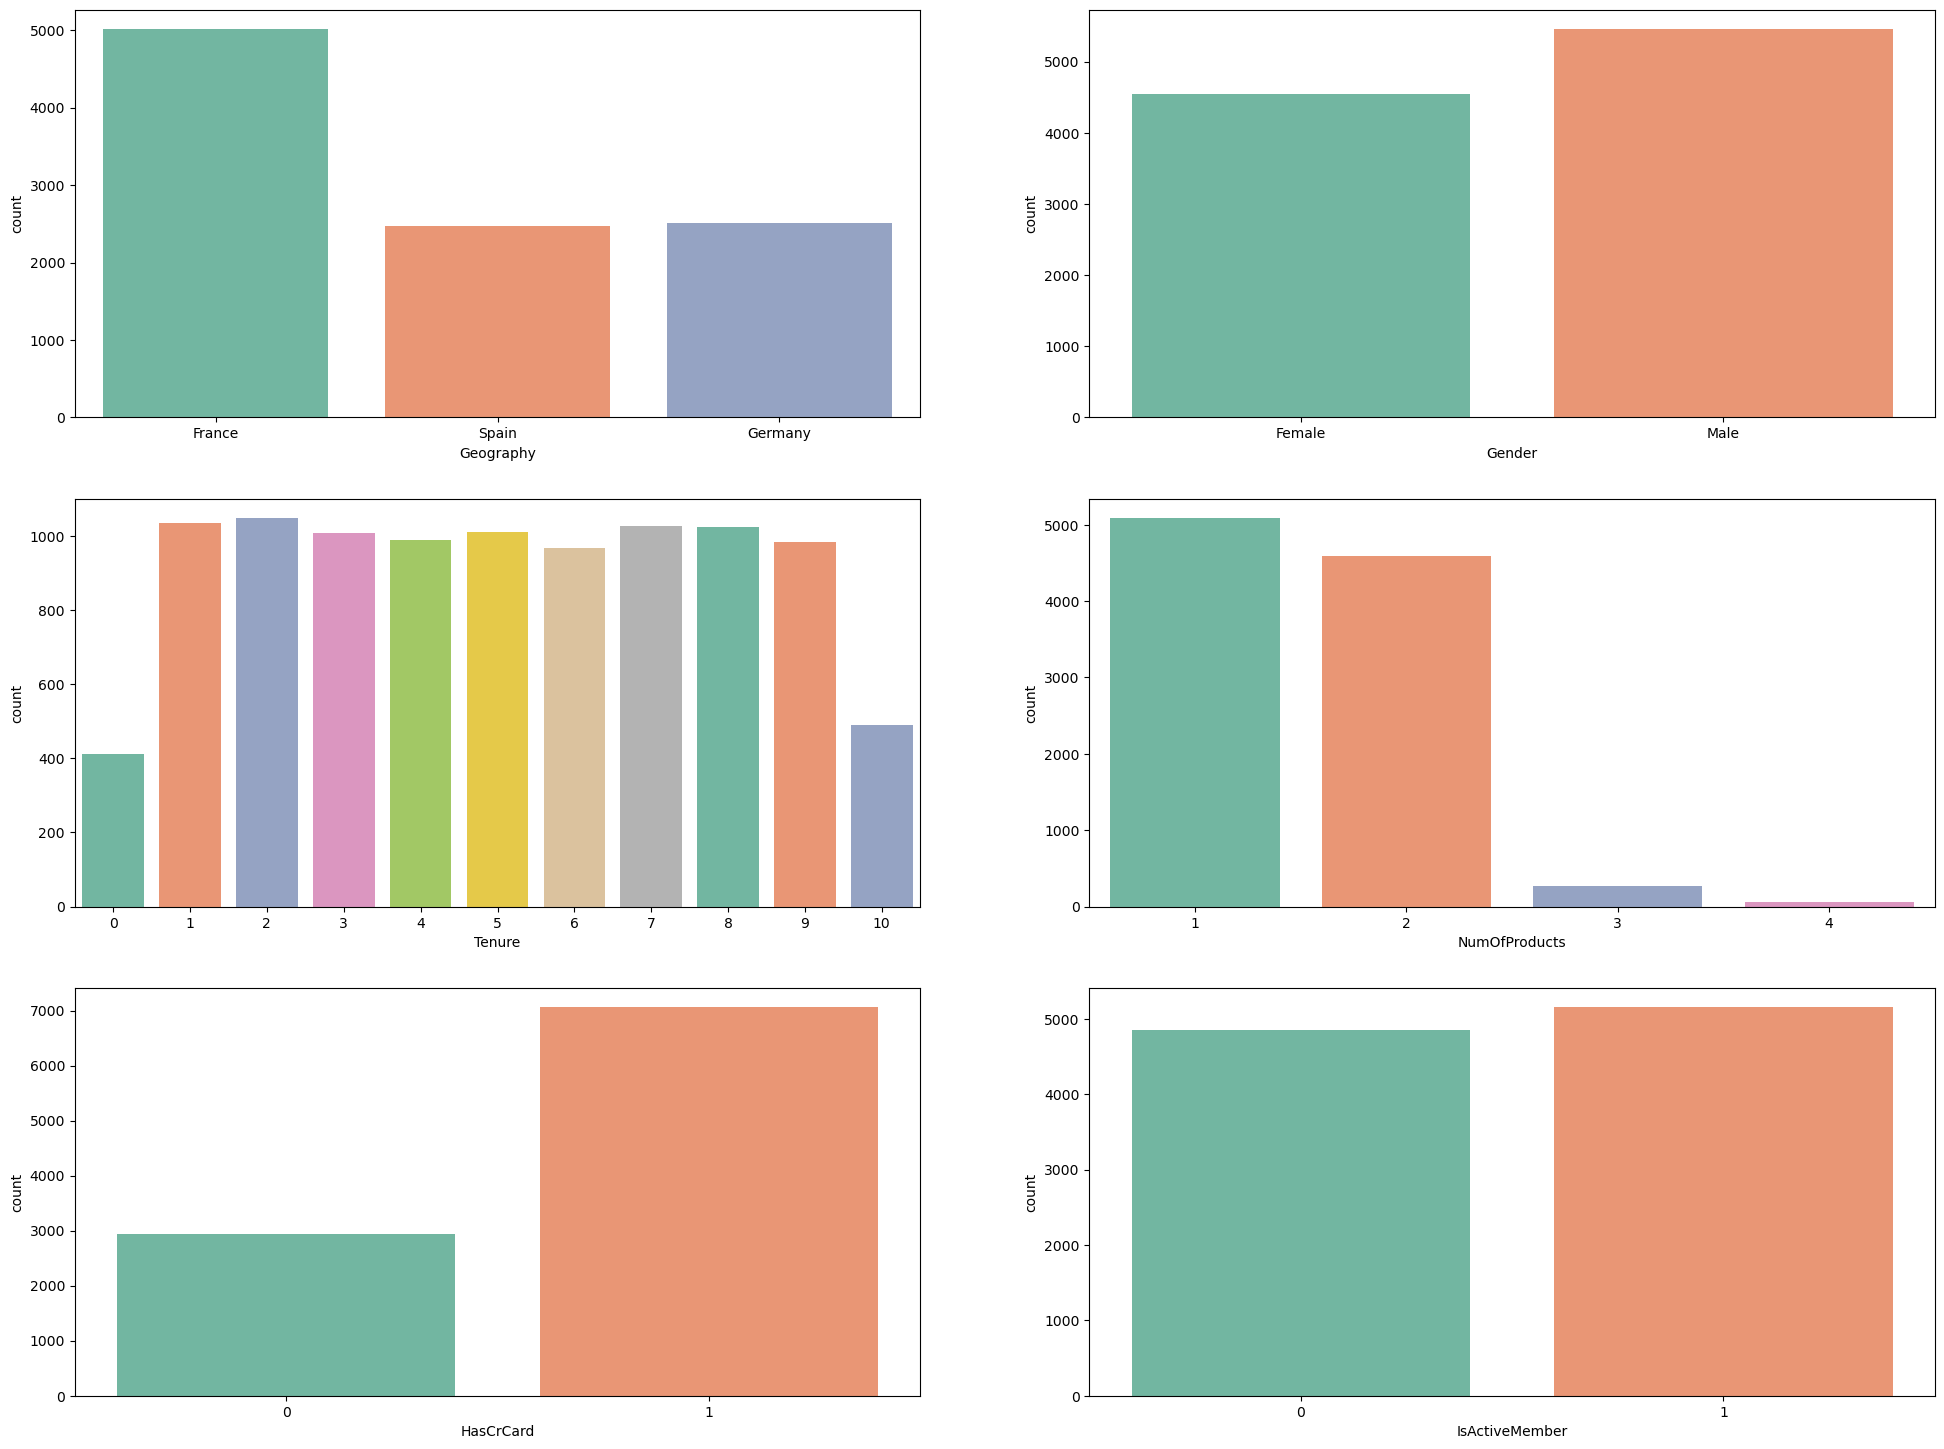

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(24,18))
axes = axes.flatten()
features = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
for i in range(len(features)):
    sns.countplot(x=features[i],data=data, palette="Set2",ax=axes[i])
    
plt.show()

<Axes: xlabel='Exited', ylabel='count'>

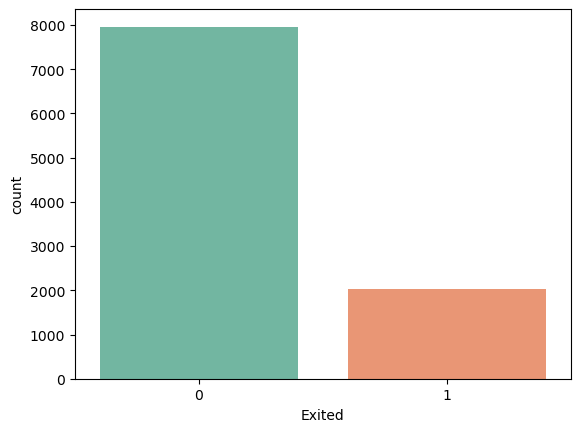

In [6]:
sns.countplot(x="Exited",data=data, palette="Set2")

Looking at the info and the charts plotted we can understand that we have a dataset with **10000 observations** with **0 Missing Values** that contains 13 features/inputs and a single target/output which is **Exited** .

We Can also notice that we have 3 catagorical features to encode and the rest is all numerical . We will cover that in the cleaning faze of this notebook.

We Can Conclude from the charts that we have an umbalanced dataset we have 8000 customer that didn't quit and 2000 customer quit and it wouldn't make sens if they were balanced because we would have a huge number of customers that quited the bank .

Looking at the other plots we can see that most of the customers are : from france , males and have a card . Also , we have a balanced Tensure and Activity of Members which explains the quit rate : We have about 5000 unactive members which with time they would quit 

In [7]:
print("Gender Count :")
print(data['Gender'].value_counts())
print("\n")
print("Female Quit Rate :")
print(data[data["Gender"]=="Female"]["Exited"].value_counts())
print("\n")
print("Male Quit Rate :")
print(data[data["Gender"]=="Male"]["Exited"].value_counts())

Gender Count :
Male      5457
Female    4543
Name: Gender, dtype: int64


Female Quit Rate :
0    3404
1    1139
Name: Exited, dtype: int64


Male Quit Rate :
0    4559
1     898
Name: Exited, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

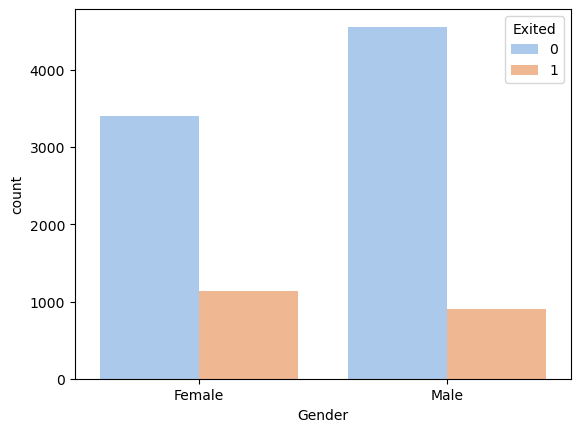

In [8]:
sns.countplot(data=data, x="Gender", hue="Exited", palette="pastel")

From this Chart we can understand that Females are more likely to quit that Males . Females have a 25% rate to quit where Males have only 16% 

In [9]:
print("Adresses :")
print(data['Geography'].value_counts())
print("\n")
l =["France","Spain","Germany"]
for x in l:
    print(f"{x} Quit Rate :")
    print(data[data["Geography"]==x]["Exited"].value_counts())
    print("\n")

Adresses :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


France Quit Rate :
0    4204
1     810
Name: Exited, dtype: int64


Spain Quit Rate :
0    2064
1     413
Name: Exited, dtype: int64


Germany Quit Rate :
0    1695
1     814
Name: Exited, dtype: int64




<Axes: xlabel='Geography', ylabel='count'>

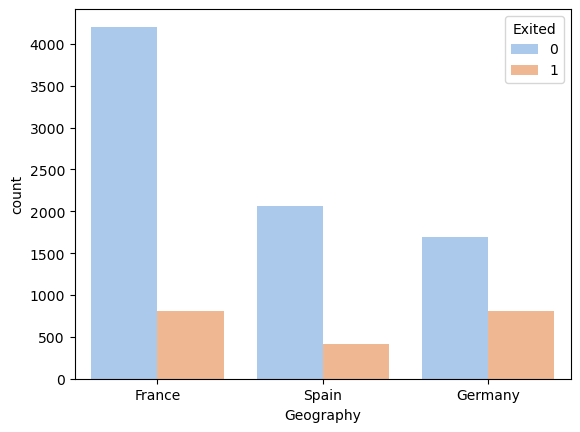

In [10]:
sns.countplot(data=data, x="Geography", hue="Exited", palette="pastel")

After having a look at this plot we can conclude that 16% of France and Spain Members quit where Germany got 32% quitting rate which is the highest amoung the 3 countries.

## Data Cleaning

It's Clear that the **RowNumber**,**CustomerId** and **Surname** Columns don't have any predictive power since they are just some general information about a certain client and for that it would make sens to drop them using **drop** method in pandas DataFrames.
Notice that we are going to set the inplace argument to **True** to apply the modifications to the current data

In [11]:
data.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True,axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Now we still got 2 Categorical features we will simply use 2 maps to transform them into numerical features

In [12]:
map_gen ={"Male":1,"Female":1}
map_geo ={"France":0,"Spain":1,"Germany":2}
data["Gender"]=data["Gender"].map(map_gen)
data["Geography"]=data["Geography"].map(map_geo)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


## Feature Engineering

We Will Try and explore our data and create some new features to improve the model efficency

Let's Start and classify the Credit Score : we can change our **CreditScore** column form a range of scalars into a catagorical and more easier column to interpret from it .

So we have 5 classes : 
* Exceptional 
* Very Good 
* Good
* Fair 
* Poor

In [13]:
data.loc[ data['CreditScore'] <= 579, 'CreditScore'] = 0
data.loc[(data['CreditScore'] >= 580) & (data['CreditScore'] <= 669), 'CreditScore'] = 1
data.loc[(data['CreditScore'] >= 670) & (data['CreditScore'] <= 739), 'CreditScore']   = 2
data.loc[(data['CreditScore'] >= 740) & (data['CreditScore'] <= 799), 'CreditScore']   = 3
data.loc[ data['CreditScore'] >= 800, 'CreditScore'] = 4
data["CreditScore"]=data["CreditScore"].astype(int)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,1,42,2,0.00,1,1,1,101348.88,1
1,1,1,1,41,1,83807.86,1,0,1,112542.58,0
2,0,0,1,42,8,159660.80,3,1,0,113931.57,1
3,2,0,1,39,1,0.00,2,0,0,93826.63,0
4,4,1,1,43,2,125510.82,1,1,1,79084.10,0


Now we are going to do the same work with the Age Colmun

In [14]:
data.loc[ data['Age'] <= 32, 'Age'] = 0
data.loc[(data['Age'] > 32) & (data['Age'] <= 37), 'Age'] = 1
data.loc[(data['Age'] > 37) & (data['Age'] <= 44), 'Age']   = 2
data.loc[ data['Age'] > 44, 'Age'] = 3
data["Age"]=data["Age"].astype(int)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,1,2,2,0.00,1,1,1,101348.88,1
1,1,1,1,2,1,83807.86,1,0,1,112542.58,0
2,0,0,1,2,8,159660.80,3,1,0,113931.57,1
3,2,0,1,2,1,0.00,2,0,0,93826.63,0
4,4,1,1,2,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age', ylabel='count'>

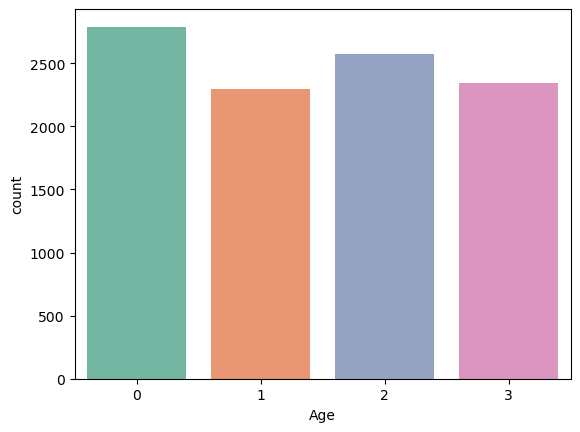

In [15]:
sns.countplot(x="Age",data=data, palette="Set2")

## Data Preprocessing

Scaling data is vital for optimizing deep learning models. Normalizing input features to a uniform range ensures balanced contributions from all attributes. This process stabilizes gradients. In sum, data scaling enhances model generalization and overall performance. For that, We are going to use **MinMaxScaler** but first we are going to split our data into train , validation and test samples using **train_test_split**

In [16]:
feature_matrix=data.drop("Exited",axis=1)
target =data["Exited"]

In [17]:
X_train, X_temp, y_train, y_temp = train_test_split(feature_matrix,target , test_size=0.3, random_state=42,stratify=target)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

In [18]:
y_train.value_counts()

0    5574
1    1426
Name: Exited, dtype: int64

In [19]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

## Building Our Model

Now We are done with the preparation of our data we will start with building our Neural Network Model and for that we will use a **sequential api model** found in keras inside the TensorFlow library

Building a sequential model means designing a linear neural network where layers are stacked in a sequence. Information flows from input to output through these layers, enabling the model to learn patterns and features at increasing levels of complexity. 

In [20]:
model = tf.keras.models.Sequential([
                                 
            # The first layers must specify the input shape always
            tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
            tf.keras.layers.Dense(16, activation='relu'),

            # The last layer usually doesn't have activation function in regression
            tf.keras.layers.Dense(1)                

])

Now to compile the model we will use **binary_crossentropy** as our loss function because our task is to predict a binary value , and we are going to set our optimize to **adam**

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50,callbacks=[early_stopping])

Epoch 1/50
219/219 [==============================] - 2s 4ms/step - loss: 0.5071 - accuracy: 0.7961 - val_loss: 0.4588 - val_accuracy: 0.7953
Epoch 2/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.8054 - val_loss: 0.4707 - val_accuracy: 0.7987
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4449 - accuracy: 0.8086 - val_loss: 0.4314 - val_accuracy: 0.8140
Epoch 4/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4273 - accuracy: 0.8154 - val_loss: 0.4201 - val_accuracy: 0.8187
Epoch 5/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.8189 - val_loss: 0.4375 - val_accuracy: 0.8153
Epoch 6/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8223 - val_loss: 0.4159 - val_accuracy: 0.8307
Epoch 7/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4149 - accuracy: 0.8271 - val_loss: 0.4304 - val_accuracy: 0.8273
Epoch 

In [23]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

47/47 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8620
Test Loss: 0.3567 - Test Accuracy: 0.8620


That's Great We got a 86% accuracy

### Accuracy variation

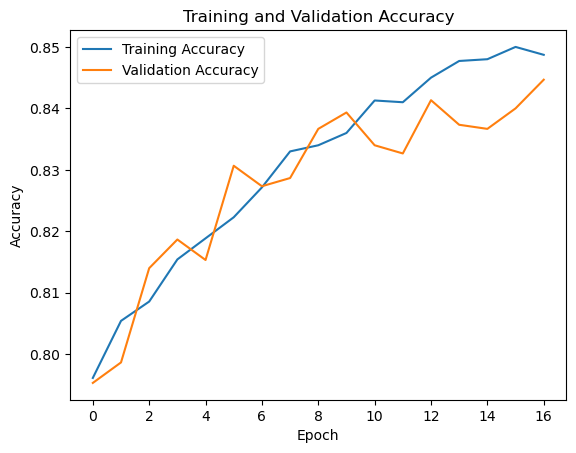

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()